In [21]:
# 考虑三维: e_2/e_1 alpha lambda

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import random


In [189]:
# Function to generate Cobb-Douglas utility functions
def Function(xs, alpha):
    res = 1.0
    for x in xs:
        res *= x**alpha
        alpha = 1.0-alpha
    return res

const__function = lambda xs: Function(xs, 0.5)

def generate_cobb_douglas_utility_function(alpha):
    return lambda xs, Alpha = alpha: Function(xs, Alpha)

def generate_functions(Number = 2, Type = 0, Alpha = 0.25):
    res = []
    res.append(const__function)
    if Type == 1:
        for whatever in np.arange(1, Number):
            alpha = random.random()
            res.append(generate_cobb_douglas_utility_function(alpha))
    else:
        res.append(generate_cobb_douglas_utility_function(Alpha))
    return res

def generate_goods(Number = 2, Type = 0, ratio = 1):
    res = []
    res.append(1)   #!!!!!!!!!!!!!!!!!!!!!!!!!!
    if Type == 1:
        for whatever in np.arange(1, Number):
            alpha = random.random()
            res.append(alpha)
    else:
        res.append(ratio)
    return res

def generate_lambda(Number = 2, Type = 0, lambda1 = 0.5):
    res = []
    if Type == 1:
        tmp = []
        sum = 0
        for whatever in np.arange(0, Number):
            alpha = random.random()
            tmp.append(alpha)
            sum += alpha
        for alpha in tmp:
            res.append(alpha/sum)
    else:
        return [lambda1, 1.0-lambda1]
    return res

In [181]:
# Function to allocate goods and maximize utility
def maximize_utility(N, L, QUES, functions, lambdas, goods):
    # Define objective function to maximize
    def objective(xs):
        sum = 0
        for i in np.arange(0, N):
            tmp = []
            for j in np.arange(0, L):
                tmp.append(xs[i*L+j])
            sum -= lambdas[i] * functions[i](tmp)
        return sum
    cons = []

    # Define constraint function: total goods should not exceed available goods
    def goods_constraint(xs, k, goods):
        res = -goods[k]
        for i in np.arange(0, N):
            idx = lambdas[i]
            res += idx*xs[i*L+k]
        return res
    
    def solve_constraint(goods):
        for j in np.arange(0, L):
            cons.append({'type': 'eq', 'fun': lambda xs, idx = j: goods_constraint(xs, k = idx, goods = goods)})
    def get_value(xs, x, y):
        tmp = []
        for j in np.arange(0, L):
            tmp.append(xs[y*L+j])
        res = functions[x](tmp)
        return res
    
    def add_constraint1():
        for i in np.arange(0, N):
            for j in np.arange(0, N):
                if i != j:
                    cons.append({'type': 'ineq', 'fun': lambda xs, idx = i, idy = j: get_value(xs, x = idx, y = idx) - get_value(xs, x = idx, y = idy)})

                
    # Bounds: x >= 0
    bounds = [(0, None)] * (N * L)
    x0 = [0] * (N * L)  #初值
    
    # Constraints
    solve_constraint(goods)
    if QUES == 2:
        add_constraint1()

    # print(cons)
    # Perform optimization
    res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

    # Return optimal allocation and utility
    return res.x, -res.fun

In [193]:
#TO modify
T = 1
N = 2
M = 2
L = 2
LIST_ALPHA = 0
LIST_LAMBDAS = 0
LIST_GOODS = 1
#0表示默认（打表）,1表示随机生成
TYPE = 0
#第几问(1,2,4)
QUES = 1

In [194]:
#TO modify alpha lambda e1/e2的修改 生成数据集
# Define the range of alpha values
if(TYPE == 0):
    if LIST_ALPHA == 1:
        start_alpha = 0.01
        end_alpha = 0.99
        num_alphas = 100
        alphas = np.linspace(start_alpha, end_alpha, num_alphas)
        all_functions = [generate_functions(Number=N, Type=TYPE, Alpha=alpha) for alpha in alphas]
    else:
        all_functions = [generate_functions(Number=N, Type=TYPE)]
    if LIST_LAMBDAS == 1:
        start_lambda = 0.01
        end_lambda = 0.99
        num_lambda = 99
        lambdas = np.linspace(start_lambda, end_lambda, num_lambda)
        all_lambdas = [generate_lambda(Number=N, Type=TYPE, lambda1=lambda1) for lambda1 in lambdas]
    else:
        all_lambdas = [generate_lambda(Number=N, Type=TYPE)]
    if LIST_GOODS == 1:
        start_ratio = 0.01
        end_ratio = 0.99
        num_ratio = 99
        ratios = np.linspace(start_ratio, end_ratio, num_ratio)
        all_goods = [generate_goods(Number=N, Type=TYPE, ratio=ratio) for ratio in ratios]
    else:
        all_goods = [generate_goods(Number=N, Type=TYPE)]
else:
    all_functions = [generate_functions(Number=N, Type=TYPE)]
    all_lambdas = [generate_lambda(Number=N, Type=TYPE)]
    all_goods = [generate_goods(Number=N, Type=TYPE)]
    
def calc(functions, lambdas, goods):
    optimal_allocation, max_utility = maximize_utility(N, L, QUES, functions, lambdas, goods)
    return optimal_allocation, max_utility
optimal_allocations = []
max_utilities = []
for functions in all_functions:
    for lambdas in all_lambdas:
        for goods in all_goods:
            optimal_allocation, max_utility = calc(functions, lambdas, goods)
            optimal_allocations.append(optimal_allocation)
            max_utilities.append(max_utility)
print(optimal_allocations)
print(max_utilities)

[array([1.99977388e+00, 1.99998529e-02, 2.26120936e-04, 1.47134490e-07]), array([1.99998113e+00, 3.99999474e-02, 1.88749887e-05, 5.26193212e-08]), array([1.99956338e+00, 5.99988416e-02, 4.36620352e-04, 1.15840704e-06]), array([1.99955982e+00, 7.99984684e-02, 4.40176175e-04, 1.53162279e-06]), array([1.99959457e+00, 9.99246189e-02, 4.05425605e-04, 7.53811252e-05]), array([1.99964094e+00, 1.19945602e-01, 3.59059281e-04, 5.43979268e-05]), array([1.99967756e+00, 1.39934157e-01, 3.22437550e-04, 6.58430581e-05]), array([1.99978656e+00, 1.59997619e-01, 2.13438956e-04, 2.38081508e-06]), array([2.00000000e+00, 1.80000000e-01, 0.00000000e+00, 1.38777878e-17]), array([2. , 0.2, 0. , 0. ]), array([1.99971983e+00, 2.19987684e-01, 2.80173984e-04, 1.23161464e-05]), array([2.00000000e+00, 2.40000000e-01, 0.00000000e+00, 2.08166817e-17]), array([1.99995656e+00, 2.59997833e-01, 4.34361571e-05, 2.16679808e-06]), array([1.99965856e+00, 2.79894216e-01, 3.41435330e-04, 1.05783886e-04]), array([1.99970267e+00

In [195]:
points_goods_1 = list(zip(np.linspace(0.01,0.99,99), max_utilities))

In [192]:
points_goods_2 = list(zip(np.linspace(0.01,0.99,99), max_utilities))

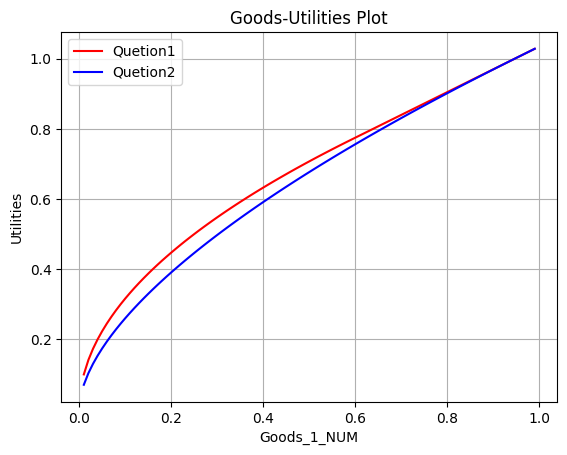

In [196]:
x_coords, y_coords = zip(*points_goods_1)
plt.plot(x_coords, y_coords, color = 'red', label = 'Quetion1')
x_coords, y_coords = zip(*points_goods_2)
plt.plot(x_coords, y_coords, color = 'blue', label = 'Quetion2')
plt.xlabel('Goods_1_NUM')
plt.ylabel('Utilities')
plt.title('Goods-Utilities Plot')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
points_alphas_1 = list(zip(alphas, max_utilities))

In [178]:
points_alphas_2 = list(zip(alphas, max_utilities))

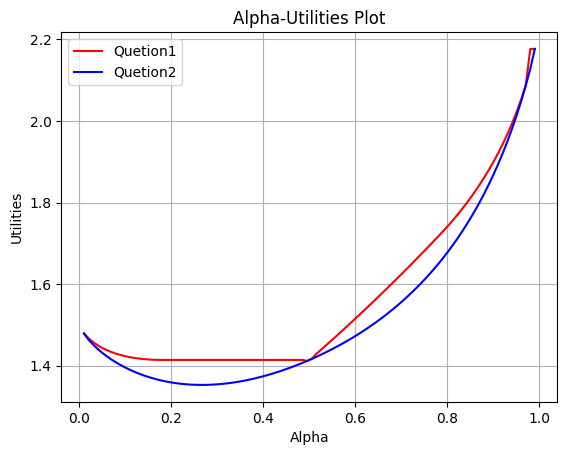

In [179]:
x_coords, y_coords = zip(*points_alphas_1)
plt.plot(x_coords, y_coords, color = 'red', label = 'Quetion1')
x_coords, y_coords = zip(*points_alphas_2)
plt.plot(x_coords, y_coords, color = 'blue', label = 'Quetion2')
plt.xlabel('Alpha')
plt.ylabel('Utilities')
plt.title('Alpha-Utilities Plot')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
points_lambdas_1 = list(zip(np.linspace(0.01,0.99,99), max_utilities))

In [115]:
points_lambdas_2 = list(zip(np.linspace(0.01,0.99,99), max_utilities))

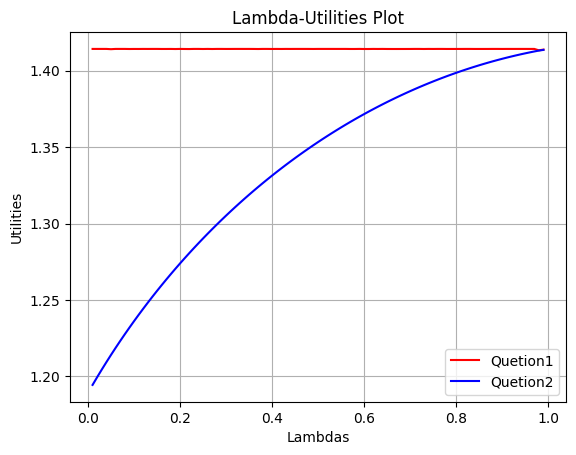

In [116]:
x_coords, y_coords = zip(*points_lambdas_1)
plt.plot(x_coords, y_coords, color = 'red', label = 'Quetion1')
x_coords, y_coords = zip(*points_lambdas_2)
plt.plot(x_coords, y_coords, color = 'blue', label = 'Quetion2')
plt.xlabel('Lambdas')
plt.ylabel('Utilities')
plt.title('Lambda-Utilities Plot')
plt.grid(True)
plt.legend()
plt.show()